In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [228]:
adr= 'C:/Users/KEARNEY/Desktop'
df= pd.read_excel(adr+'/새 폴더/c_project/LDH/data/CJ_master.xlsx')

In [229]:
df.head()

,name,address,category,d20221201,d20221202,d20221203,d20221204,d20221205,d20221206,d20221207,...,m_카레덮밥,m_고르곤졸라피자,m_로제떡볶이,m_감자튀김,m_으깬감자,m_삼겹살구이,m_차돌박이숙주볶음,m_버섯베이컨알프레도파스타,카카오평점,카카오후기수
0,미장플라쎄,"서울특별시 마포구 양화로19길 22-30,2층(동교동)",FO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,4.5,51
1,이관우파스타,"서울특별시 마포구 동교로46길 29,지상 2층",FO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,3.7,35
2,디트로이트피지스,"서울특별시 마포구 동교로46길 34,1층(연남동)",FO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0.0,0
3,피크닉마나올라나,서울특별시 마포구 성미산로 153-16 (연남동)1층 안쪽,FO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,3.4,12
4,키노키친,서울특별시 마포구 와우산로29길 91층 1호 (서교동),FO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,4.5,30


In [234]:
#sales 12부터 follow까지
start_idx = df.columns.get_loc('sales12')
end_idx = df.columns.get_loc('follow')+1

In [235]:
row_start_idx = df[df['category']=='POS'].index[0]

In [236]:
#행, 열 앞에 부분 제거
tmp_df = df.iloc[row_start_idx:,start_idx:end_idx]

In [238]:
df[['카카오평점','카카오후기수']]

,카카오평점,카카오후기수
0,4.5,51
1,3.7,35
2,0.0,0
3,3.4,12
4,4.5,30
...,...,...
68,4.8,9
69,3.2,9
70,4.5,351
71,0.0,0


In [239]:
tmp_df= pd.concat([tmp_df,df[['카카오평점','카카오후기수']]],axis=1)

In [240]:
tmp_df.head()

,sales12,sales1,sales2,buy12,buy1,buy2,visitorReview,blogReview,age1,age2,review1st,review1stComment,review2nd,review2ndComment,follower,follow,카카오평점,카카오후기수
15,25010000,11966553.333333,14326000,N,N,N,888.0,1123.0,20.0,30.0,279.0,음식,156.0,서비스,NaN,NaN,3.4,36
16,1217333.333333,2800333.333333,3459333.333333,N,N,N,119.0,13.0,NaN,NaN,50.0,음식,31.0,서비스,NaN,NaN,4.0,4
17,211846700,210647933.333333,241953866.666666,N,N,N,1783.0,2483.0,20.0,10.0,675.0,음식,217.0,서비스,14000.0,2005.0,3.4,104
18,22836666.666667,21553333.333333,9573333.333333,N,N,N,1184.0,1118.0,20.0,10.0,678.0,음식,331.0,메뉴,1391.0,1.0,3.2,49
19,3638000,2881333.333333,3778333.333333,N,N,N,62.0,33.0,NaN,NaN,15.0,음식,12.0,메뉴,7143.0,25.0,4.1,9


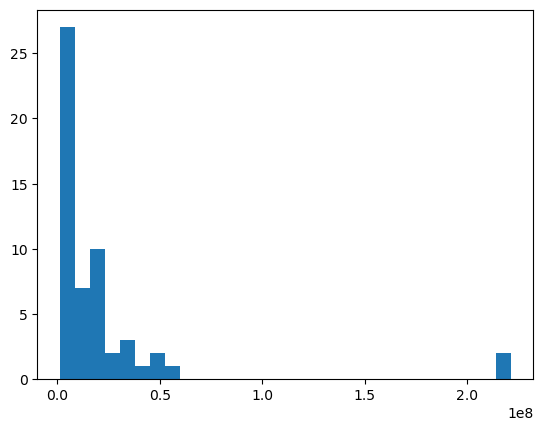

In [241]:
#매장명 붙이기
tmp_df['매장'] = df.iloc[:,0]

#정수형 변환
tmp_df[['sales12','sales1','sales2']] = tmp_df[['sales12','sales1','sales2']].astype(float)

#평균 매출
tmp_df['total_sales'] = (tmp_df['sales12']+tmp_df['sales1']+tmp_df['sales2'])/3

#2달치만 있는 것들 보정
#sales12가 0인 인덱스들

idx1 = tmp_df[tmp_df['sales12'] ==0].index[0]
idx2 = tmp_df[tmp_df['sales12'] ==0].index[1]

tmp_df.loc[idx1,'total_sales'] = tmp_df.loc[idx1,'total_sales']*3/2
tmp_df.loc[idx2,'total_sales'] = tmp_df.loc[idx2,'total_sales']*3/2

#vistorrevie 없는것들 삭제(폐업)
tmp_df = tmp_df.dropna(subset=["visitorReview"])

#시각화 
plt.hist(tmp_df['total_sales'], bins=30)
plt.show()


In [242]:
tmp_ = tmp_df[tmp_df['total_sales']<2*10**8]

In [243]:
tmp_[['blogReview','visitorReview','total_sales']].corr()

,blogReview,visitorReview,total_sales
blogReview,1.000000,0.469231,0.475620
visitorReview,0.469231,1.000000,0.538217
total_sales,0.475620,0.538217,1.000000


In [244]:

#이상치들 살펴보기
tmp_df[tmp_df['total_sales']>2*10**8]


,sales12,sales1,sales2,buy12,buy1,buy2,visitorReview,blogReview,age1,age2,review1st,review1stComment,review2nd,review2ndComment,follower,follow,카카오평점,카카오후기수,매장,total_sales
17,2.118467e+08,2.106479e+08,2.419539e+08,N,N,N,1783.0,2483.0,20.0,10.0,675.0,음식,217.0,서비스,14000.0,2005.0,3.4,104,감성타코(홍대점),2.214828e+08
44,9.659667e+07,2.664967e+08,2.925500e+08,N,N,N,174.0,171.0,20.0,30.0,81.0,매장,79.0,음식,520.0,0.0,3.5,17,슬로우야드바비큐,2.185478e+08


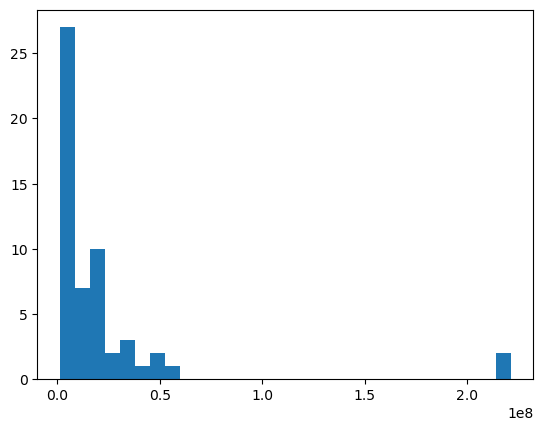

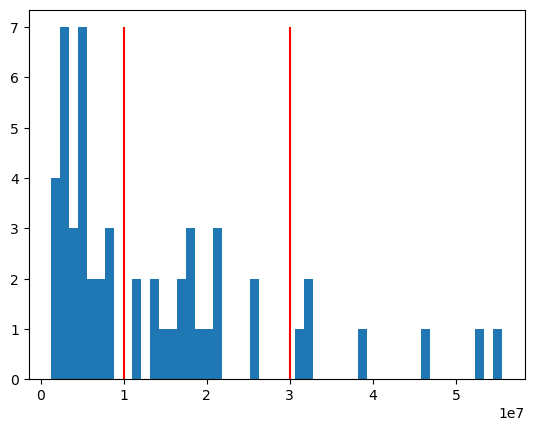

In [246]:

#슬로우바비큐 삭제(최근에 생긴 가게로 급격히 매출 증가)
tmp_df = tmp_df[tmp_df['매장'] != '슬로우야드 바비큐']

plt.hist(tmp_df['total_sales'], bins=30)
plt.show()

#6 미만인것들 보고 기준 설정
under_2 = tmp_df[tmp_df['total_sales']<2*10**8]

plt.hist(under_2['total_sales'],bins=50)
plt.vlines(1*10**7, 0 ,7, color='red')
plt.vlines(3*10**7, 0 ,7, color='red')
plt.show()


In [247]:
# 0.31, 0.75 기준으로 라벨링
tmp_df['label'] = pd.cut(tmp_df['total_sales'], bins=[-float('inf'), 1*10**7, 3*10**7, float('inf')], labels=['small', 'mid', 'big'])

# 인스타 여부 변수로 추가
tmp_df['instagram'] = np.where(tmp_df['follow'].isnull(), 0, 1)
tmp_df['label'].value_counts()

small    28
mid      18
big       9
Name: label, dtype: int64

In [248]:
tmp_df[tmp_df['label']=='small'][['blogReview','visitorReview','total_sales']].corr()

,blogReview,visitorReview,total_sales
blogReview,1.000000,0.770811,0.554756
visitorReview,0.770811,1.000000,0.511567
total_sales,0.554756,0.511567,1.000000


In [249]:
# 원핫 인코딩 age1,age2
import pandas as pd

# color 열을 원핫인코딩
one_hot_encoded1 = pd.get_dummies(tmp_df['review1stComment'])
one_hot_encoded2 = pd.get_dummies(tmp_df['review2ndComment'])

new_df = tmp_df.rename(columns={'매장': '식당'})


# 원핫인코딩한 결과를 포함한 DataFrame 생성
df_encoded = pd.concat([new_df, one_hot_encoded1, one_hot_encoded2], axis=1)



# review1st,2ndComment 인코딩 후

In [250]:
df_encoded.head()

,sales12,sales1,sales2,buy12,buy1,buy2,visitorReview,blogReview,age1,age2,...,가성비,메뉴,분위기,서비스,술,양,음식,인테리어,재료,혼밥
15,2.501000e+07,1.196655e+07,1.432600e+07,N,N,N,888.0,1123.0,20.0,30.0,...,0,0,0,1,0,0,0,0,0,0
16,1.217333e+06,2.800333e+06,3.459333e+06,N,N,N,119.0,13.0,NaN,NaN,...,0,0,0,1,0,0,0,0,0,0
17,2.118467e+08,2.106479e+08,2.419539e+08,N,N,N,1783.0,2483.0,20.0,10.0,...,0,0,0,1,0,0,0,0,0,0
18,2.283667e+07,2.155333e+07,9.573333e+06,N,N,N,1184.0,1118.0,20.0,10.0,...,0,1,0,0,0,0,0,0,0,0
19,3.638000e+06,2.881333e+06,3.778333e+06,N,N,N,62.0,33.0,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0


In [251]:
df_encoded.columns

Index(['sales12', 'sales1', 'sales2', 'buy12', 'buy1', 'buy2', 'visitorReview',
       'blogReview', 'age1', 'age2', 'review1st', 'review1stComment',
       'review2nd', 'review2ndComment', 'follower', 'follow', '카카오평점',
       '카카오후기수', '식당', 'total_sales', 'label', 'instagram', '가성비', '매장', '뷰',
       '서비스', '음식', '음악', '인테리어', '가성비', '메뉴', '분위기', '서비스', '술', '양', '음식',
       '인테리어', '재료', '혼밥'],
      dtype='object')

In [252]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# 데이터를 분할하는 함수
def stratified_sampling(X, y, n_splits=5, random_state=42):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    for train_idx, test_idx in skf.split(X, y):
        yield X.iloc[train_idx], X.iloc[test_idx], y.iloc[train_idx], y.iloc[test_idx]

# 분할된 데이터에서 RandomForestClassifier의 파라미터를 조정하는 함수
def optimize_rf(X_train, y_train):
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search #.best_params_

# 데이터를 로드하고 StratifiedKFold와 RandomForestClassifier를 사용하여 파라미터를 조정
from sklearn.datasets import load_iris
import pandas as pd

X=df_encoded[['blogReview','visitorReview','review1st','review2nd','instagram','가성비', '매장', '뷰',
       '서비스', '음식', '음악', '인테리어', '가성비', '메뉴', '분위기', '서비스', '술', '양', '음식',
       '인테리어', '재료', '혼밥']]#
y=df_encoded['label']

result = pd.DataFrame({'y_pred': [0],'y_true': [0]})
best_params = None
for X_train, X_test, y_train, y_test in stratified_sampling(X, y, n_splits=5, random_state=42):
    params = optimize_rf(X_train, y_train)
    if best_params is None or params.best_score_ > best_score:
        best_params = params.best_params_
        best_score = params.best_score_
    rf = RandomForestClassifier(random_state=42, **params.best_params_)
    rf.fit(X_train, y_train)
    print(f"Test score: {rf.score(X_test, y_test)}")
    print(f"Best params: {best_params}")
    
    #y_pred_test랑 y_test랑 합치기
    tmp_result = pd.DataFrame({'y_pred': rf.predict(X_test),'y_true': np.array(y_test)}, index=y_test.index)
    result = pd.concat([result, tmp_result],axis=0)
    
print(f"Best params: {best_params}")


Test score: 0.9090909090909091
Best params: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Test score: 0.8181818181818182
Best params: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Test score: 0.6363636363636364
Best params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Test score: 0.7272727272727273
Best params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Test score: 0.7272727272727273
Best params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [361]:
X=df_encoded[['blogReview','visitorReview','review1st','review2nd','instagram','가성비', '매장', '뷰',
       '서비스', '음식', '음악', '인테리어', '가성비', '메뉴', '분위기', '서비스', '술', '양', '음식',
       '인테리어', '재료', '혼밥']]
X.columns

Index(['blogReview', 'visitorReview', 'review1st', 'review2nd', 'instagram',
       '가성비', '가성비', '매장', '뷰', '서비스', '서비스', '음식', '음식', '음악', '인테리어', '인테리어',
       '가성비', '가성비', '메뉴', '분위기', '서비스', '서비스', '술', '양', '음식', '음식', '인테리어',
       '인테리어', '재료', '혼밥'],
      dtype='object')

In [184]:
result = result[1:]

In [196]:
result['식당'] = df_encoded.loc[result.index, '식당']
result['예측여부']=0
result.head()

In [206]:
for i in result.index:
    if result.loc[i,'y_pred'] == result.loc[i,'y_true']:
        result.loc[i,'예측여부'] = 1
    else:
        result.loc[i,'예측여부'] = 0

In [208]:
result.head()

,y_pred,y_true,식당,예측여부
15,mid,mid,kitchen485,1
18,mid,mid,광야,1
27,mid,mid,몰토베네합정,1
30,small,small,벨라또띠아,1
34,small,small,비볼리,1


In [215]:
result = result[['식당','y_true','y_pred','예측여부']]
non_true = result[result['예측여부']==0]

In [213]:
result['예측여부'].sum()

42

In [214]:
42/55*100

76.36363636363637

In [220]:
non_true_sales = df_encoded.loc[non_true.index, 'total_sales']

In [221]:
non_true['매출평균'] = non_true_sales

C:\Users\KEARNEY\AppData\Local\Temp\ipykernel_4404\1973233434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_true['매출평균'] = non_true_sales


In [223]:
non_true

,식당,y_true,y_pred,예측여부,매출평균
64,크레이지카츠,big,mid,0,3.172067e+07
28,묘한식탁,small,mid,0,4.915111e+06
36,빌리더다이닝,big,mid,0,5.555952e+07
35,비스트로에버,big,small,0,3.094286e+07
47,에트나퓨,small,mid,0,8.853000e+06
66,토모토카레,big,mid,0,3.866226e+07
67,토파,mid,small,0,1.382111e+07
20,덩크트레이,big,small,0,4.666214e+07
44,슬로우야드바비큐,big,small,0,2.185478e+08
69,해물기와,mid,small,0,1.765214e+07


In [264]:
# 추론

In [272]:
#원핫부터

In [344]:
tt = df.iloc[:row_start_idx,start_idx:end_idx]

In [345]:
tt['매장']=df.loc[:row_start_idx,'name']

In [346]:
tt.shape

(15, 17)

In [347]:
tt['매장']

0             미장플라쎄
1            이관우파스타
2          디트로이트피지스
3          피크닉마나올라나
4              키노키친
5           탑클라우드23
6              브런치가
7       최고당돈까스(상암점)
8            501파스타
9             애프터모닝
10    온샐러드&포케마포구청역점
11           테이커테이블
12         비닐하우스공덕점
13      까르보네(마포성산점)
14         그리너(연남점)
Name: 매장, dtype: object

In [348]:
tt['instagram'] = np.where(tt['follow'].isnull(), 0, 1)

In [354]:
# 원핫 인코딩 age1,age2
import pandas as pd

# color 열을 원핫인코딩
one_hot_encoded_tt1 = pd.get_dummies(tt['review1stComment'])
one_hot_encoded_tt2 = pd.get_dummies(tt['review2ndComment'])

new_df_tt = tt.rename(columns={'매장': '식당'})


# 원핫인코딩한 결과를 포함한 DataFrame 생성
df_encoded_tt = pd.concat([new_df_tt, one_hot_encoded_tt1, one_hot_encoded_tt2], axis=1)



In [355]:
df_encoded_tt.columns

Index(['sales12', 'sales1', 'sales2', 'buy12', 'buy1', 'buy2', 'visitorReview',
       'blogReview', 'age1', 'age2', 'review1st', 'review1stComment',
       'review2nd', 'review2ndComment', 'follower', 'follow', '식당',
       'instagram', '서비스', '술', '음식', '재료', '가성비', '뷰', '서비스', '음식', '인테리어',
       '재료'],
      dtype='object')

In [356]:
set(tmp_coll)-set(df_encoded_tt.columns)

{'매장', '메뉴', '분위기', '양', '음악', '혼밥'}

In [365]:
for i in ['매장', '음악', '메뉴', '분위기', '양', '혼밥']:
    df_encoded_tt[i] = 0

In [366]:
df_encoded_tt.columns

Index(['sales12', 'sales1', 'sales2', 'buy12', 'buy1', 'buy2', 'visitorReview',
       'blogReview', 'age1', 'age2', 'review1st', 'review1stComment',
       'review2nd', 'review2ndComment', 'follower', 'follow', '식당',
       'instagram', '서비스', '술', '음식', '재료', '가성비', '뷰', '서비스', '음식', '인테리어',
       '재료', '매장', '음악', '메뉴', '분위기', '양', '혼밥'],
      dtype='object')

In [367]:
X=df_encoded_tt[['blogReview','visitorReview','review1st','review2nd','instagram','가성비', '매장', '뷰',
       '서비스', '음식', '음악', '인테리어', '가성비', '메뉴', '분위기', '서비스', '술', '양', '음식',
       '인테리어', '재료', '혼밥']]

In [368]:
X.columns

Index(['blogReview', 'visitorReview', 'review1st', 'review2nd', 'instagram',
       '가성비', '매장', '뷰', '서비스', '서비스', '음식', '음식', '음악', '인테리어', '가성비', '메뉴',
       '분위기', '서비스', '서비스', '술', '양', '음식', '음식', '인테리어', '재료', '재료', '혼밥'],
      dtype='object')

In [374]:
len(X.columns)

27

In [373]:
X.columns[25]

'재료'

In [382]:
X= X.iloc[:,:25]

In [381]:
X.iloc[:,26:]

,혼밥
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [ ]:
# 

       '가성비',  '인테리어',
       '가성비', ' 
       '인테리어', ],
      dtype='object')

In [ ]:
# 
Index(['blogReview', 'visitorReview', 'review1st', 'review2nd', 'instagram',
       '가성비', '가성비', '매장', '뷰', '서비스', '서비스', '음식', '음식', '음악', '인테리어', '인테리어',
       '가성비', '가성비', '메뉴', '분위기', '서비스', '서비스', '술', '양', '음식', '음식', '인테리어',
       '인테리어', '재료', '혼밥'],
      dtype='object')

In [383]:
for i in ['a','b','c','d','e']:
    X[i] = 0
len(X.columns)

30

In [384]:
X = X.rename(columns = {'a': '가성비' ,'b':'가성비', 'c':'인테리어' ,'d':'인테리어' ,'e':'혼밥'})

In [364]:
len(X.columns)

34

In [ ]:
len([,
       '가성비', ' '인테리어',
       '가성비',    ',
       '인테리어', '])

In [385]:
y_pred = rf.predict(X)

C:\Users\KEARNEY\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [386]:
y_pred

array(['mid', 'small', 'small', 'small', 'small', 'big', 'mid', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'mid'],
      dtype=object)

In [387]:
pd.DataFrame({'매장': tt['매장'], '예측규모' :y_pred})

,매장,예측규모
0,미장플라쎄,mid
1,이관우파스타,small
2,디트로이트피지스,small
3,피크닉마나올라나,small
4,키노키친,small
5,탑클라우드23,big
6,브런치가,mid
7,최고당돈까스(상암점),small
8,501파스타,small
9,애프터모닝,small


In [174]:
pd.DataFrame({'y_pred': rf.predict(X_test),'y_true': np.array(y_test)})

,y_pred,y_true
0,small,small
1,small,small
2,mid,big
3,mid,mid
4,mid,mid
5,small,mid
6,small,small
7,big,small
8,small,small
9,big,big


In [179]:
y_test.index

19

In [ ]:
# 모델 저장
import joblib

joblib.dump(rf, 'random_forest_model.pkl')

#불러오기
loaded_model = joblib.load('random_forest_model.pkl')

loaded_model.predict(X)

In [ ]:
df

In [61]:
tmp_df['age1'].dtype

dtype('float64')

# scaling 전

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# 데이터를 분할하는 함수
def stratified_sampling(X, y, n_splits=5, random_state=42):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    for train_idx, test_idx in skf.split(X, y):
        yield X.iloc[train_idx], X.iloc[test_idx], y.iloc[train_idx], y.iloc[test_idx]

# 분할된 데이터에서 RandomForestClassifier의 파라미터를 조정하는 함수
def optimize_rf(X_train, y_train):
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search #.best_params_

# 데이터를 로드하고 StratifiedKFold와 RandomForestClassifier를 사용하여 파라미터를 조정
from sklearn.datasets import load_iris
import pandas as pd

X=tmp_df[['blogReview','visitorReview','review1st','review2nd','instagram']]#
X = X.iloc[:,:].astype(int)
y= tmp_df['label']

best_params = None
for X_train, X_test, y_train, y_test in stratified_sampling(X, y, n_splits=5, random_state=42):
    params = optimize_rf(X_train, y_train)
    if best_params is None or params.best_score_ > best_score:
        best_params = params.best_params_
        best_score = params.best_score_
    rf = RandomForestClassifier(random_state=42, **params.best_params_)
    rf.fit(X_train, y_train)
    print(f"Test score: {rf.score(X_test, y_test)}")
    print(f"Best params: {best_params}")
    
print(f"Best params: {best_params}")


Test score: 0.9090909090909091
Best params: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Test score: 0.7272727272727273
Best params: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Test score: 0.5454545454545454
Best params: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Test score: 0.6363636363636364
Best params: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Test score: 0.8181818181818182
Best params: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best params: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
#'blogReview','visitorReview','review1st','review2nd','instagram' 0.9 0.72,0.54,0.6, 0.8
#'blogReview','visitorReview','review1st','instagram' 0.9,0.8,0.54, 0.6,0.72
#blog, visit, insta 0.7, 0.6 0.6 0.6 0.6
#blog visit 0.9, 0.7 0.6 0.6 0.4
#blog 0.4, 0.6,0.4 0.6 0.5

In [32]:
#최종 모델
rf = RandomForestClassifier(random_state=42, **best_params)
rf.fit(X_train, y_train)

print("Accuracy on test set:", rf.score(X_test, y_test))

Accuracy on test set: 0.7272727272727273


In [ ]:
# 모델 저장
import joblib

joblib.dump(rf, 'random_forest_model.pkl')

#불러오기
loaded_model = joblib.load('random_forest_model.pkl')

loaded_model.predict(X)

In [ ]:
# DNN
